In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [57]:
# Load data
images = np.load("Data/sample_1000_image.npy")
labels = np.load("Data/sample_1000_label.npy")
# Normalize image data.  0-255 to 0-1
images = images / 255
df = pd.DataFrame(np.concatenate((images, labels), axis=1))
# Rename the last column as "label"
df.rename(columns={784:"label"}, inplace=True)
# Convert label column to integer type
df['label'] = df['label'].astype('int64')

In [59]:
# Display the first 10 rows in the data frame
df.iloc[0:10, :]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [60]:
# Get "img" data frame and "lbl" series from the df
img = df.iloc[:, 0:-1]
lbl = df['label']
# Split into train, validation and test set
x_train1, x_test, y_train1, y_test = train_test_split(img, lbl, test_size = 0.10, random_state = 123, stratify = lbl)
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size = 0.2, random_state = 123, stratify = y_train1)

In [61]:
# Reset all the indices (from 0 to length-1)
x_train.reset_index(drop=True, inplace=True)
x_valid.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_valid.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [6]:
from sklearn.decomposition import PCA

In [62]:
# Feature proprocessing and dimensionality reduction (PCA)
pca = PCA(n_components=784)
data_pca = pca.fit_transform(x_train)

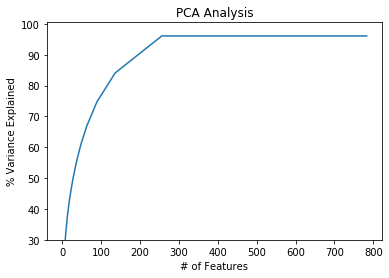

In [63]:
# Plot pca graph
variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [64]:
np.argmax(var)

256

In [ ]:
pca = PCA(n_components=256)
x_train_pca = pca.fit_transform(x_train)
print(x_train_pca.shape)
print(x_train.shape)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Fit Random Forest model
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [82]:
rnd_clf.fit(x_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [83]:
x_valid_pca = pca.transform(x_valid)
pred_valid = rnd_clf.predict(x_valid_pca)

In [84]:
np.mean(pred_valid == y_valid)

0.13570048309178745

In [41]:
pred_train = rnd_clf.predict(x_train_pca)

In [33]:
np.mean(pred_train == y_train)

0.1822061191626409

In [85]:
x_test_pca = pca.transform(x_test)

In [86]:
pred_test = rnd_clf.predict(x_test_pca)

In [87]:
np.mean(pred_test == y_test)

0.1372463768115942

In [ ]:
# Select the best model & evaluate on the test set